In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Task 1    
Make a program that plots the function     
g(y)=exp(y)Sin(4y) for xЄ[0;4]        
using a red solid line. Use 500 intervals for evaluating points in [0; 4]. Store all coordinates and values in arrays. Set labels on the axis and use a title “Damped sine wave”.

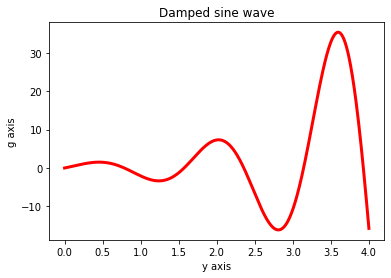

In [2]:
from matplotlib import pyplot as plt
from matplotlib import style   
import math 
a = 0
b = 4
g = []
y = []
step = (b-a)/500
i = a
k=0
while k <= 500 :
    y = np.append(y, i)
    g = np.append(g, (pow(math.e, i)*math.sin(4 * i))) 
    i += step
    k += 1
plt.plot(y, g, 'red', label='line g(y)', linewidth=3)   
plt.title('Damped sine wave') 
plt.ylabel('g axis')   
plt.xlabel('y axis')   
 
plt.show() 

Task 2
As the Task 1, but add a black dashed curve for the function  

h(y)=exp(−3y/2)Sin(4y).  

Include a legend for each curve (with names g and h).

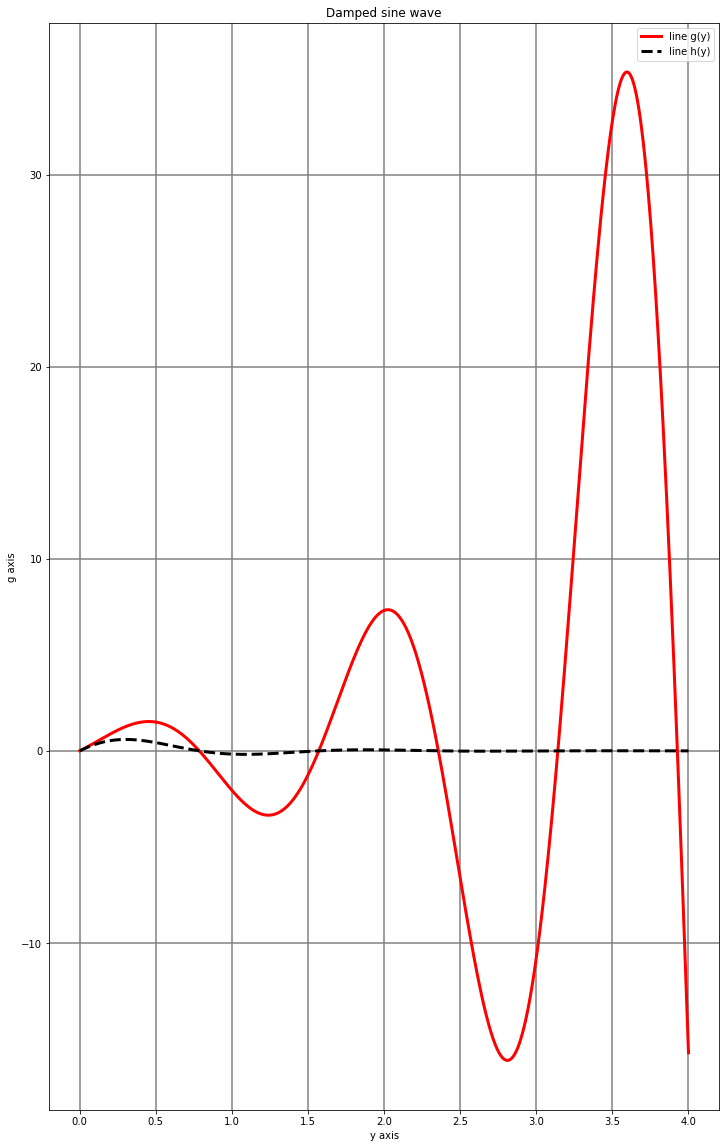

In [3]:
from matplotlib import pyplot as plt
from matplotlib import style   
import math 
a, b = 0, 4
g = []
y = []
h = []
step = (b-a)/500
i = a
k = 0
while k <= 500 :
    y = np.append(y, i)
    g = np.append(g, (pow(math.e, i)*math.sin(4 * i))) 
    h = np.append(h, (pow(math.e, (-3/2)*i)*math.sin(4 * i)))
    i += step
    k += 1
plt.figure(figsize=(12,20))
plt.plot(y, g, 'red', label='line g(y)', linewidth=3)
plt.plot(y, h, 'black', linestyle='dashed', label='line h(y)', linewidth=3)
plt.grid(color='gray', linestyle='-', linewidth=1.5)
plt.legend()
plt.title('Damped sine wave') 
plt.ylabel('g axis')   
plt.xlabel('y axis')   
 
plt.show() 

Taks 3   
Make a program that plots the function   

z(x,y)=Cos(x+y)Sin(xy)  

for  

x∈[−2;2],y∈[−2;2].  


Use 500 intervals for evaluating points in the intervals.

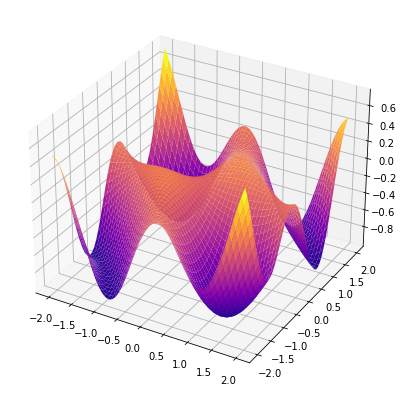

In [4]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
a,b = -2,2
def makeData():
        x = np.arange(a, b, (b-a)/500)
        y = np.arange(a, b, (b-a)/500)
        xgrid, ygrid = np.meshgrid(x, y)
        zgrid = np.cos(xgrid+ygrid)*np.sin(xgrid*ygrid)
        return xgrid, ygrid, zgrid

x, y, z = makeData()

fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(1, 2, 1, projection="3d")
ax.plot_surface(x, y, z, rstride = 10, cstride = 10, cmap = cm.plasma)
plt.show()

Task 4   
Make a program that plots the zero level isosurface of the function   

F(x,y,z)=con(con(con(con(con(1−x2, 1−y2), 1−z2), x2+y2−0.25), x2+z2−0.16), y2+z2−0.09),  

 where   

con(a,b)=a+b−√a2+b2.

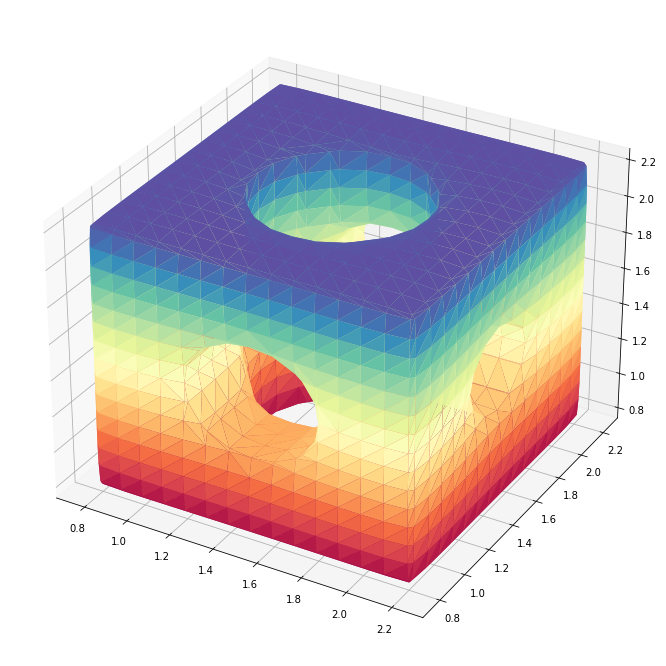

In [53]:
import numpy as np
from skimage import measure
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def con(a, b):    
    return a+b-(((a)**2 + (b)**2))**(0.5)

def fun(x, y, z):    
    return con(con(con(con(con(1 - (x)**2, 1 - (y)**2), 1 - (z)**2), (x)**2 + (y)**2 - 0.25), (x)**2 + (z)**2 - 0.16),
               (y)**2 + (z)**2 - 0.09)

x, y, z = np.mgrid[-2:2:31j, -2:2:31j, -2:2:31j]

vol = fun(x, y, z)
iso_val = 0.0
verts, faces, _, _ = measure.marching_cubes(vol, iso_val, spacing = (0.1, 0.1, 0.1))

fig = plt.figure(figsize = (12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2],
                cmap='Spectral', lw=1)
plt.show()

Task 4 (old version)   
Make a program that plots the zero level isosurface of the function   

F(x,y,z)=con(con(1−x2, 1−y2), 1−z2),  

 where   

con(a,b)=a+b−√a2+b2.


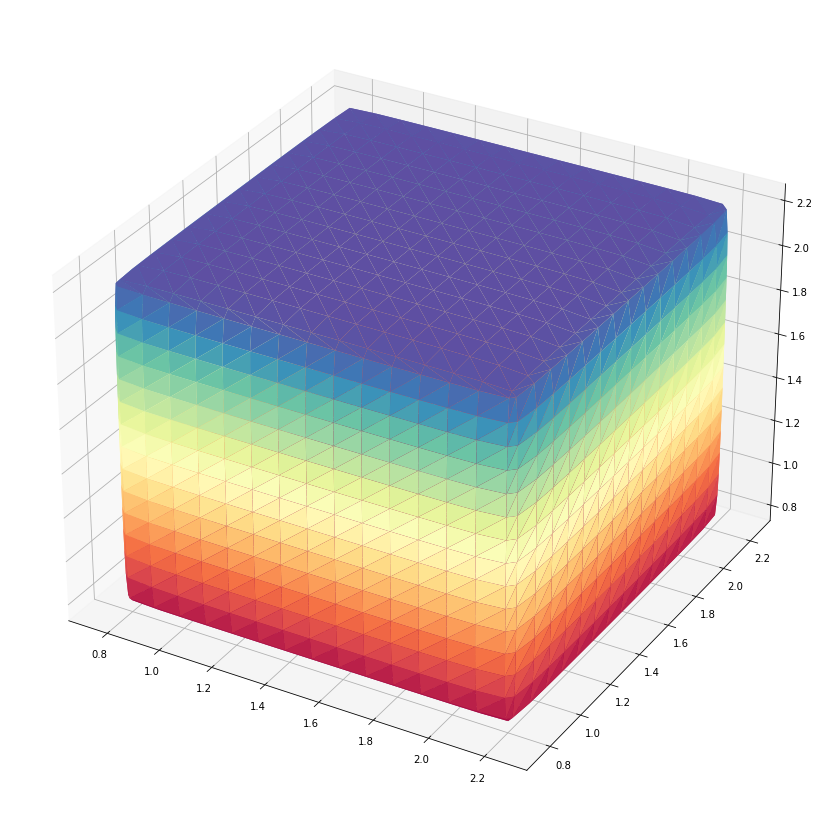

In [54]:
import numpy as np
from skimage import measure
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def con(a, b):    
    return a+b-(((a)**2 + (b)**2))**(0.5)

def fun(x, y, z):    
    return con(con(1 - (x)**2, 1 - (y)**2), 1 - (z)**2)

x, y, z = np.mgrid[-2:2:31j, -2:2:31j, -2:2:31j]
vol = fun(x, y, z)
iso_val=0.0
verts, faces, _, _ = measure.marching_cubes(vol, iso_val, spacing=(0.1, 0.1, 0.1))

fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2],
                cmap='Spectral', lw=1)
plt.show()